In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, isnan, when, abs, avg
spark = SparkSession.builder.appName('Stock Data').getOrCreate()

Loading file in dataframe

In [4]:
dataset = spark.read.csv('./Data/AMZN_data.csv', inferSchema=True, header=True)

In [5]:
dataset.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [6]:
dataset.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [7]:
dataset.show()

+----------+--------+--------+--------+--------+---------+----------+
|      Date|    Open|    High|     Low|   Close|Adj Close|    Volume|
+----------+--------+--------+--------+--------+---------+----------+
|1997-05-15|0.121875|   0.125|0.096354|0.097917| 0.097917|1443120000|
|1997-05-16|0.098438|0.098958|0.085417|0.086458| 0.086458| 294000000|
|1997-05-19|0.088021|0.088542| 0.08125|0.085417| 0.085417| 122136000|
|1997-05-20|0.086458|  0.0875|0.081771|0.081771| 0.081771| 109344000|
|1997-05-21|0.081771|0.082292| 0.06875|0.071354| 0.071354| 377064000|
|1997-05-22|0.071875|0.072396|0.065625|0.069792| 0.069792| 235536000|
|1997-05-23|0.070313|0.076042|0.066667|   0.075|    0.075| 318744000|
|1997-05-27|0.075521|0.082292|0.072917|0.079167| 0.079167| 173952000|
|1997-05-28| 0.08125|0.081771|0.076563|0.076563| 0.076563|  91488000|
|1997-05-29|0.077083|0.077083|0.073958| 0.07526|  0.07526|  69456000|
|1997-05-30|   0.075|0.075521|0.073958|   0.075|    0.075|  51888000|
|1997-06-02|0.075521

In [8]:
null_checks = [count(when(col(c).isNull(), c)).alias(c) for c in dataset.columns]
dataset.select(null_checks).show()

+----+----+----+---+-----+---------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|
+----+----+----+---+-----+---------+------+
|   0|   0|   0|  0|    0|        0|     0|
+----+----+----+---+-----+---------+------+



In [9]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [10]:
featureassembler=VectorAssembler(inputCols=["Open", "High", "Low"], outputCol='Features')

In [11]:
output=featureassembler.transform(dataset)

In [12]:
output.show()

+----------+--------+--------+--------+--------+---------+----------+--------------------+
|      Date|    Open|    High|     Low|   Close|Adj Close|    Volume|            Features|
+----------+--------+--------+--------+--------+---------+----------+--------------------+
|1997-05-15|0.121875|   0.125|0.096354|0.097917| 0.097917|1443120000|[0.121875,0.125,0...|
|1997-05-16|0.098438|0.098958|0.085417|0.086458| 0.086458| 294000000|[0.098438,0.09895...|
|1997-05-19|0.088021|0.088542| 0.08125|0.085417| 0.085417| 122136000|[0.088021,0.08854...|
|1997-05-20|0.086458|  0.0875|0.081771|0.081771| 0.081771| 109344000|[0.086458,0.0875,...|
|1997-05-21|0.081771|0.082292| 0.06875|0.071354| 0.071354| 377064000|[0.081771,0.08229...|
|1997-05-22|0.071875|0.072396|0.065625|0.069792| 0.069792| 235536000|[0.071875,0.07239...|
|1997-05-23|0.070313|0.076042|0.066667|   0.075|    0.075| 318744000|[0.070313,0.07604...|
|1997-05-27|0.075521|0.082292|0.072917|0.079167| 0.079167| 173952000|[0.075521,0.08229...|

In [13]:
output.select(['Features']).show()

+--------------------+
|            Features|
+--------------------+
|[0.121875,0.125,0...|
|[0.098438,0.09895...|
|[0.088021,0.08854...|
|[0.086458,0.0875,...|
|[0.081771,0.08229...|
|[0.071875,0.07239...|
|[0.070313,0.07604...|
|[0.075521,0.08229...|
|[0.08125,0.081771...|
|[0.077083,0.07708...|
|[0.075,0.075521,0...|
|[0.075521,0.07656...|
|[0.076563,0.07656...|
|[0.073958,0.07447...|
|[0.070833,0.07708...|
|[0.075781,0.08541...|
|[0.082813,0.08541...|
|[0.085417,0.08541...|
|[0.079688,0.08020...|
|[0.079167,0.08229...|
+--------------------+
only showing top 20 rows



In [14]:
output.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Features']

In [15]:
final_data=output.select("Date", "Features", "Close").sort("Date", ascending=True)

In [16]:
final_data.show()

+----------+--------------------+--------+
|      Date|            Features|   Close|
+----------+--------------------+--------+
|1997-05-15|[0.121875,0.125,0...|0.097917|
|1997-05-16|[0.098438,0.09895...|0.086458|
|1997-05-19|[0.088021,0.08854...|0.085417|
|1997-05-20|[0.086458,0.0875,...|0.081771|
|1997-05-21|[0.081771,0.08229...|0.071354|
|1997-05-22|[0.071875,0.07239...|0.069792|
|1997-05-23|[0.070313,0.07604...|   0.075|
|1997-05-27|[0.075521,0.08229...|0.079167|
|1997-05-28|[0.08125,0.081771...|0.076563|
|1997-05-29|[0.077083,0.07708...| 0.07526|
|1997-05-30|[0.075,0.075521,0...|   0.075|
|1997-06-02|[0.075521,0.07656...|0.075521|
|1997-06-03|[0.076563,0.07656...|0.073958|
|1997-06-04|[0.073958,0.07447...|0.070833|
|1997-06-05|[0.070833,0.07708...|0.077083|
|1997-06-06|[0.075781,0.08541...|0.082813|
|1997-06-09|[0.082813,0.08541...|0.084375|
|1997-06-10|[0.085417,0.08541...|0.079167|
|1997-06-11|[0.079688,0.08020...|0.077083|
|1997-06-12|[0.079167,0.08229...|0.080208|
+----------

In [17]:
train_data, test_data=final_data.randomSplit([0.75,0.25])
print(f"""There are {train_data.count()} rows in the trainning set,
      and {test_data.count()} in the test set""")

There are 5040 rows in the trainning set,
      and 1674 in the test set


Linear Regression model

In [18]:
from pyspark.ml.regression import LinearRegression

In [19]:
regressor=LinearRegression(featuresCol='Features', labelCol='Close')
lr_model=regressor.fit(train_data)

In [20]:
lr_model.coefficients

DenseVector([-0.6146, 0.817, 0.7977])

In [21]:
lr_model.intercept

0.007206952777077133

Test

In [22]:
pred_test1=lr_model.transform(test_data)
pred_test1.select("Features", "Close", "Prediction").show()

+--------------------+--------+-------------------+
|            Features|   Close|         Prediction|
+--------------------+--------+-------------------+
|[0.086458,0.0875,...|0.081771|0.09078688665158544|
|[0.08125,0.081771...|0.076563|0.08515264334085508|
|[0.075,0.075521,0...|   0.075|0.08180956608955316|
|[0.075521,0.07656...|0.075521|0.08317190052232894|
|[0.079688,0.08020...|0.077083|0.08483565746878373|
|[0.076302,0.07630...|0.075521| 0.0820630284960852|
|[0.076042,0.07604...|0.075521|0.08263340144483851|
|[0.075781,0.07578...|0.074479|0.08154197199437907|
|[0.079948,0.09583...|0.095573|0.09993492300628076|
|[0.106771,0.12395...|0.121875|0.12803202054054486|
|[0.109375,0.11093...|0.107813|0.11662484930547708|
|[0.109375,0.11666...|0.114583|0.12213607998451351|
|[0.111458,0.11979...|0.116146|0.12507146059964666|
|[0.108333,0.11510...|0.114583|0.11859108906364264|
|[0.114063,0.11510...|0.109896|0.11880886505801322|
|[0.111458,0.11145...|0.109896|0.11618424141064404|
|[0.108854,0

In [23]:
from pyspark.ml.evaluation import RegressionEvaluator

In [24]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="mse")
mse = evaluator.evaluate(pred_test1)
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="r2")
r2 = evaluator_r2.evaluate(pred_test1)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  0.18930120960766228 
r2:  0.9999266580996308 



In [25]:
pred_test1=pred_test1.withColumn("MAPE",abs(col("Close")-col("Prediction"))/col("Close"))
mape = pred_test1.select(avg("MAPE")).collect()[0][0]*100
print('MAPE: ', mape)

MAPE:  1.0213220745490443


In [26]:
pandas_df1 = pred_test1.select("Close", "Prediction").toPandas()

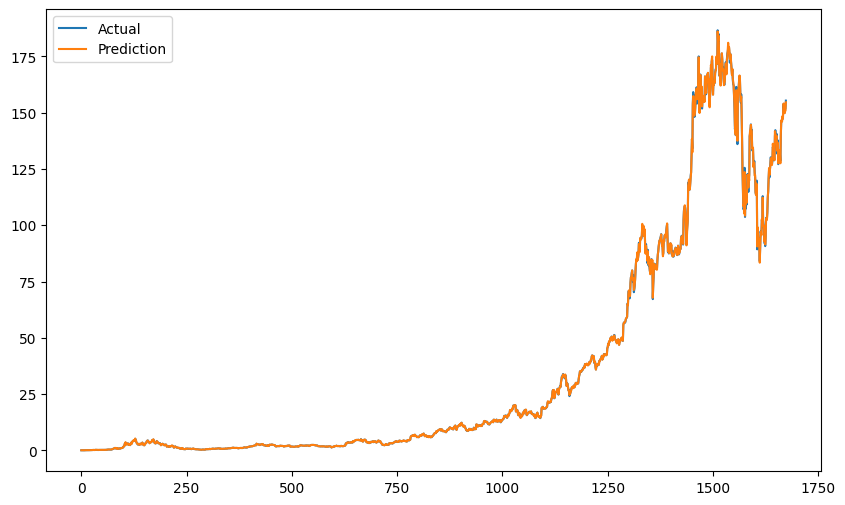

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pandas_df1['Close'], label='Actual')
plt.plot(pandas_df1['Prediction'], label='Prediction')
plt.legend()
plt.show()

Train

In [28]:
pred_train1=lr_model.transform(train_data)
pred_train1.select("Features", "Close", "Prediction").show()

+--------------------+--------+-------------------+
|            Features|   Close|         Prediction|
+--------------------+--------+-------------------+
|[0.121875,0.125,0...|0.097917|0.11129043392925712|
|[0.098438,0.09895...|0.086458|0.09569369497682205|
|[0.088021,0.08854...|0.085417|0.09026197996412387|
|[0.081771,0.08229...|0.071354| 0.0790257045057559|
|[0.071875,0.07239...|0.069792|0.07452982837398021|
|[0.070313,0.07604...|   0.075|0.07930000940729089|
|[0.075521,0.08229...|0.079167|0.08619113006959431|
|[0.077083,0.07708...| 0.07526|0.08180551349097392|
|[0.076563,0.07656...|0.073958|0.08170025882259502|
|[0.073958,0.07447...|0.070833|0.07827545195436987|
|[0.070833,0.07708...|0.077083|0.08149254257262496|
|[0.075781,0.08541...|0.082813|0.09066178009814684|
|[0.082813,0.08541...|0.084375|0.09215650924023261|
|[0.085417,0.08541...|0.079167|0.08557041906708664|
|[0.079167,0.08229...|0.080208|0.08768899408579424|
|[0.08125,0.08125,...|0.079167|0.08680416423718125|
|[0.080208,0

In [29]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="mse")
mse = evaluator.evaluate(pred_train1)
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Close", metricName="r2")
r2 = evaluator_r2.evaluate(pred_train1)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  0.19340709343954168 
r2:  0.9999231263860964 



In [30]:
pred_train1=pred_train1.withColumn("MAPE",abs(col("Close")-col("Prediction"))/col("Close"))
mape = pred_train1.select(avg("MAPE")).collect()[0][0]*100
print('MAPE: ', mape)

MAPE:  0.9758541021814865


In [31]:
pandas_df1 = pred_train1.select("Close", "Prediction").toPandas()

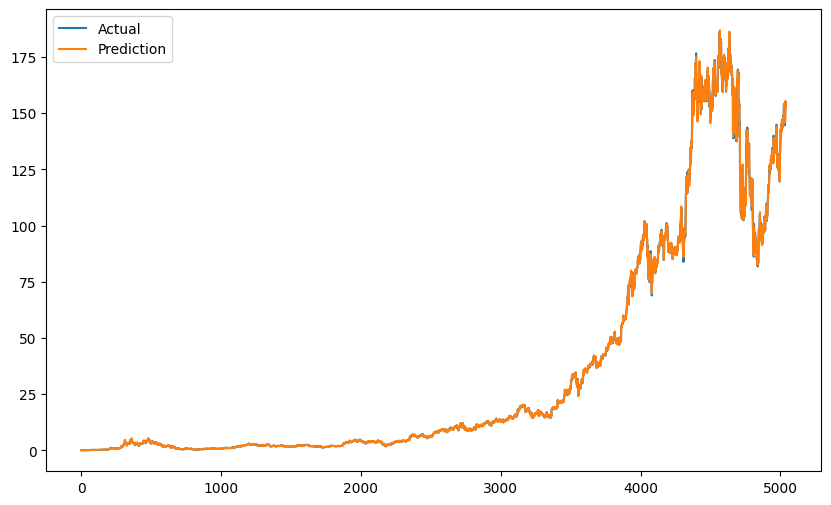

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(pandas_df1['Close'], label='Actual')
plt.plot(pandas_df1['Prediction'], label='Prediction')
plt.legend()
plt.show()

Random Forest Regressor model

In [33]:
from pyspark.ml.regression import RandomForestRegressor

In [34]:
rf=RandomForestRegressor(featuresCol='Features', labelCol='Close')
rf_model=rf.fit(train_data)

Test

In [35]:
pred_test2=rf_model.transform(test_data)
pred_test2.select("Features", "Close", "Prediction").show()

+--------------------+--------+------------------+
|            Features|   Close|        Prediction|
+--------------------+--------+------------------+
|[0.086458,0.0875,...|0.081771|0.7151891244244648|
|[0.08125,0.081771...|0.076563|0.7151891244244648|
|[0.075,0.075521,0...|   0.075|0.7151891244244648|
|[0.075521,0.07656...|0.075521|0.7151891244244648|
|[0.079688,0.08020...|0.077083|0.7151891244244648|
|[0.076302,0.07630...|0.075521|0.7151891244244648|
|[0.076042,0.07604...|0.075521|0.7151891244244648|
|[0.075781,0.07578...|0.074479|0.7151891244244648|
|[0.079948,0.09583...|0.095573|0.7151891244244648|
|[0.106771,0.12395...|0.121875|0.7151891244244648|
|[0.109375,0.11093...|0.107813|0.7151891244244648|
|[0.109375,0.11666...|0.114583|0.7151891244244648|
|[0.111458,0.11979...|0.116146|0.7151891244244648|
|[0.108333,0.11510...|0.114583|0.7151891244244648|
|[0.114063,0.11510...|0.109896|0.7151891244244648|
|[0.111458,0.11145...|0.109896|0.7151891244244648|
|[0.108854,0.1125,...|0.107813|

In [36]:
mse = evaluator.evaluate(pred_test2)
r2 = evaluator_r2.evaluate(pred_test2)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  7.409525715359092 
r2:  0.9971292909436498 



In [37]:
pred_test2=pred_test2.withColumn("MAPE",abs(col("Close")-col("Prediction"))/col("Close"))
mape = pred_test2.select(avg("MAPE")).collect()[0][0]*100
print('MAPE: ', mape)

MAPE:  24.949356142840234


In [38]:
pandas_df2 = pred_test2.select("Close", "Prediction").toPandas()

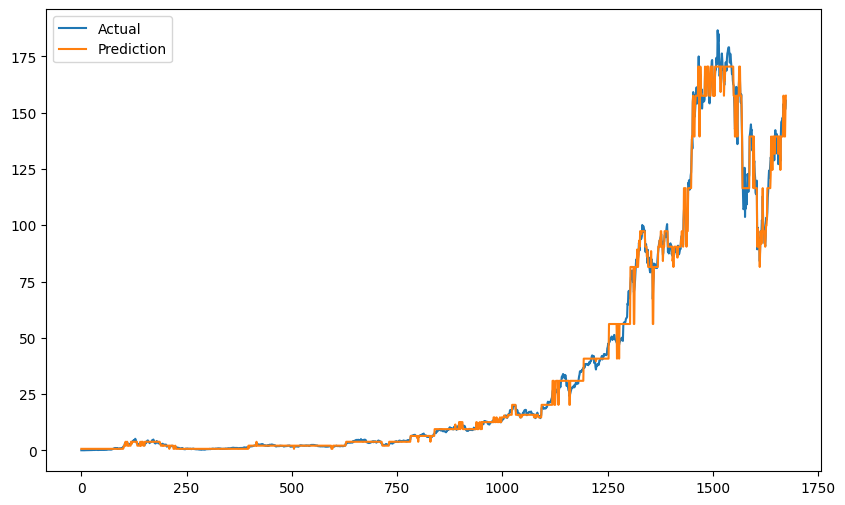

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(pandas_df2['Close'], label='Actual')
plt.plot(pandas_df2['Prediction'], label='Prediction')
plt.legend()
plt.show()

Train

In [40]:
pred_train2=rf_model.transform(train_data)
pred_train2.select("Features", "Close", "Prediction").show()

+--------------------+--------+------------------+
|            Features|   Close|        Prediction|
+--------------------+--------+------------------+
|[0.121875,0.125,0...|0.097917|0.7151891244244648|
|[0.098438,0.09895...|0.086458|0.7151891244244648|
|[0.088021,0.08854...|0.085417|0.7151891244244648|
|[0.081771,0.08229...|0.071354|0.7151891244244648|
|[0.071875,0.07239...|0.069792|0.7151891244244648|
|[0.070313,0.07604...|   0.075|0.7151891244244648|
|[0.075521,0.08229...|0.079167|0.7151891244244648|
|[0.077083,0.07708...| 0.07526|0.7151891244244648|
|[0.076563,0.07656...|0.073958|0.7151891244244648|
|[0.073958,0.07447...|0.070833|0.7151891244244648|
|[0.070833,0.07708...|0.077083|0.7151891244244648|
|[0.075781,0.08541...|0.082813|0.7151891244244648|
|[0.082813,0.08541...|0.084375|0.7151891244244648|
|[0.085417,0.08541...|0.079167|0.7151891244244648|
|[0.079167,0.08229...|0.080208|0.7151891244244648|
|[0.08125,0.08125,...|0.079167|0.7151891244244648|
|[0.080208,0.08020...|0.078646|

In [41]:
mse = evaluator.evaluate(pred_train2)
r2 = evaluator_r2.evaluate(pred_train2)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  7.711608262668582 
r2:  0.9969348632171791 



In [42]:
pred_train2=pred_train2.withColumn("MAPE",abs(col("Close")-col("Prediction"))/col("Close"))
mape = pred_train2.select(avg("MAPE")).collect()[0][0]*100
print('MAPE: ', mape)

MAPE:  22.153484611795257


In [43]:
pandas_df2 = pred_train2.select("Close", "Prediction").toPandas()

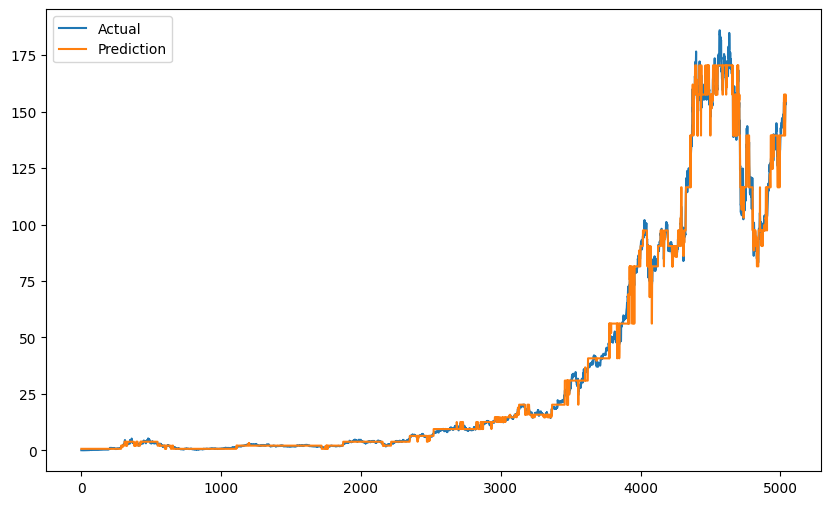

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(pandas_df2['Close'], label='Actual')
plt.plot(pandas_df2['Prediction'], label='Prediction')
plt.legend()
plt.show()

Gradient-Boosted Tree Regression

In [45]:
from pyspark.ml.regression import GBTRegressor

In [46]:
gbt = GBTRegressor(featuresCol='Features', labelCol='Close', maxIter=10)
gbt_model = gbt.fit(train_data)

In [47]:
pred_test3=gbt_model.transform(test_data)
pred_test3.select("Features", "Close", "Prediction").show(truncate=False)

+----------------------------+--------+-------------------+
|Features                    |Close   |Prediction         |
+----------------------------+--------+-------------------+
|[0.086458,0.0875,0.081771]  |0.081771|0.29438687661298407|
|[0.08125,0.081771,0.076563] |0.076563|0.29438687661298407|
|[0.075,0.075521,0.073958]   |0.075   |0.29438687661298407|
|[0.075521,0.076563,0.075]   |0.075521|0.29438687661298407|
|[0.079688,0.080208,0.076563]|0.077083|0.29438687661298407|
|[0.076302,0.076302,0.074479]|0.075521|0.29438687661298407|
|[0.076042,0.076042,0.07526] |0.075521|0.29438687661298407|
|[0.075781,0.075781,0.073958]|0.074479|0.29438687661298407|
|[0.079948,0.095833,0.079688]|0.095573|0.29438687661298407|
|[0.106771,0.123958,0.106771]|0.121875|0.29438687661298407|
|[0.109375,0.110938,0.107813]|0.107813|0.29438687661298407|
|[0.109375,0.116667,0.108854]|0.114583|0.29438687661298407|
|[0.111458,0.119792,0.110938]|0.116146|0.29438687661298407|
|[0.108333,0.115104,0.105208]|0.114583|0

In [48]:
mse = evaluator.evaluate(pred_test3)
r2 = evaluator_r2.evaluate(pred_test3)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  7.792941903654782 
r2:  0.996980742120638 



In [49]:
pred_test3=pred_test3.withColumn("MAPE",abs(col("Close")-col("Prediction"))/col("Close"))
mape = pred_test3.select(avg("MAPE")).collect()[0][0]*100
print('MAPE: ', mape)

MAPE:  9.688888135099557


In [50]:
pandas_df3 = pred_test3.select("Close", "Prediction").toPandas()

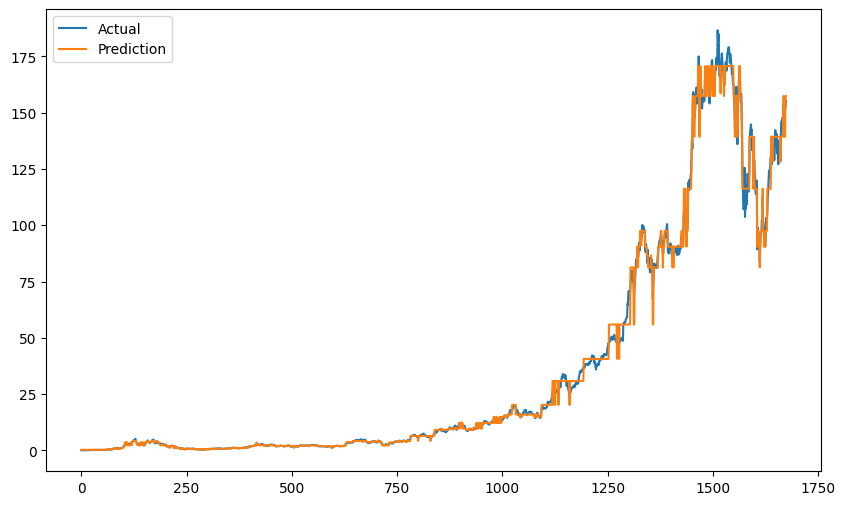

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(pandas_df3['Close'], label='Actual')
plt.plot(pandas_df3['Prediction'], label='Prediction')
plt.legend()
plt.show()

Train

In [52]:
pred_train3=gbt_model.transform(train_data)
pred_train3.select("Features", "Close", "Prediction").show(truncate=False)

+----------------------------+--------+-------------------+
|Features                    |Close   |Prediction         |
+----------------------------+--------+-------------------+
|[0.121875,0.125,0.096354]   |0.097917|0.29438687661298407|
|[0.098438,0.098958,0.085417]|0.086458|0.29438687661298407|
|[0.088021,0.088542,0.08125] |0.085417|0.29438687661298407|
|[0.081771,0.082292,0.06875] |0.071354|0.29438687661298407|
|[0.071875,0.072396,0.065625]|0.069792|0.29438687661298407|
|[0.070313,0.076042,0.066667]|0.075   |0.29438687661298407|
|[0.075521,0.082292,0.072917]|0.079167|0.29438687661298407|
|[0.077083,0.077083,0.073958]|0.07526 |0.29438687661298407|
|[0.076563,0.076563,0.073958]|0.073958|0.29438687661298407|
|[0.073958,0.074479,0.069792]|0.070833|0.29438687661298407|
|[0.070833,0.077083,0.06875] |0.077083|0.29438687661298407|
|[0.075781,0.085417,0.075521]|0.082813|0.29438687661298407|
|[0.082813,0.085417,0.082813]|0.084375|0.29438687661298407|
|[0.085417,0.085417,0.076563]|0.079167|0

In [53]:
mse = evaluator.evaluate(pred_train3)
r2 = evaluator_r2.evaluate(pred_train3)
print('MSE: ', mse, '\n' + 'r2: ', r2, '\n')

MSE:  7.805937993519358 
r2:  0.9968973699320048 



In [54]:
pred_train3=pred_train3.withColumn("MAPE",abs(col("Close")-col("Prediction"))/col("Close"))
mape = pred_train3.select(avg("MAPE")).collect()[0][0]*100
print('MAPE: ', mape)

MAPE:  9.037505958076993


In [55]:
pandas_df3 = pred_train3.select("Close","Prediction").toPandas()

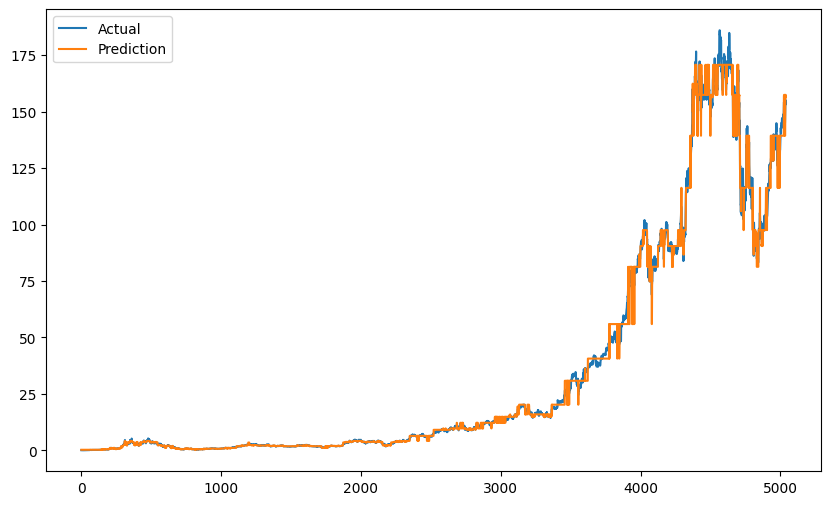

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(pandas_df3['Close'], label='Actual')
plt.plot(pandas_df3['Prediction'], label='Prediction')
plt.legend()
plt.show()

Linear Regression model

In [57]:
pandas_df = pred_train1.select("Close", "Prediction").toPandas()

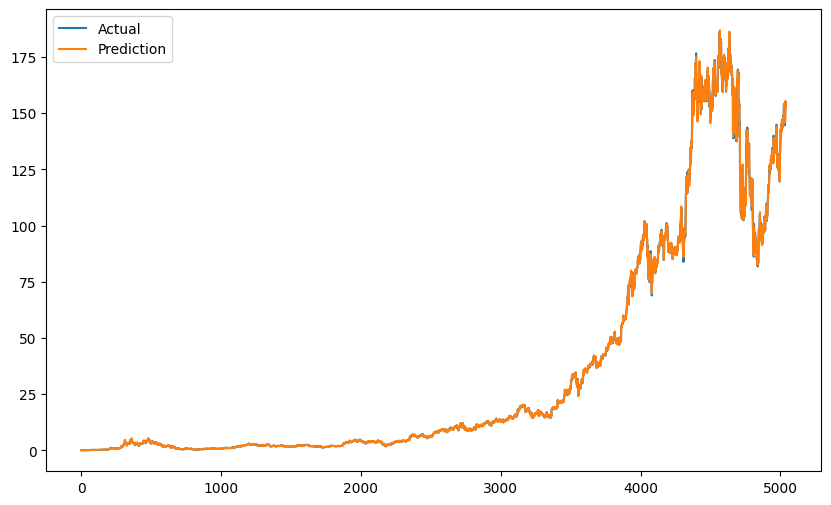

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Close'], label='Actual')
plt.plot(pandas_df['Prediction'], label='Prediction')
plt.legend()
plt.show()

In [59]:
lr_model.write().overwrite().save("Saved model 2")